In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def find_vertices(nodes):
    angle = np.pi*2 / nodes
    x_poly= [np.cos(n*angle) for n in np.arange(nodes)]
    y_poly = [np.sin(n*angle) for n in np.arange(nodes)]
    x_poly.append(x_poly[0]) ; y_poly.append(y_poly[0])
    poly_verts={'x':x_poly,'y':y_poly}
    return poly_verts

In [33]:
def star_reorder_vertices(nodes,poly_verts):
    x_star=[]; y_star=[]
    a=int(nodes/2)
    m=0 
    if nodes%2==1:  
        for i in range(nodes+1): 
            if m>nodes: m=m-nodes
            x_star.append(poly_verts['x'][m])
            y_star.append(poly_verts['y'][m])
            m=m+a
    elif nodes==4:
        x_star = [poly_verts['x'][0],poly_verts['x'][2],poly_verts['x'][1],poly_verts['x'][3]]
        y_star = [poly_verts['y'][0],poly_verts['y'][2],poly_verts['y'][1],poly_verts['y'][3]]
    elif nodes==6:
        x_star = [poly_verts['x'][0],poly_verts['x'][2],poly_verts['x'][4],poly_verts['x'][6],poly_verts['x'][1],poly_verts['x'][3],poly_verts['x'][5],poly_verts['x'][1]]
        y_star = [poly_verts['y'][0],poly_verts['y'][2],poly_verts['y'][4],poly_verts['y'][6],poly_verts['y'][1],poly_verts['y'][3],poly_verts['y'][5],poly_verts['y'][1]]
    else:
        if a%2==1: b = int(a+2)
        else: b = int(a+1)
        for i in range(nodes+1): 
            if m>nodes: m=m-nodes
            x_star.append(poly_verts['x'][m])
            y_star.append(poly_verts['y'][m])           
            m=m+b
    star_verts={'x':x_star,'y':y_star}
    return star_verts

#Fix hard coding for n=4 and n=6

In [34]:
def plotting_graph1(nodes,poly_verts,star_verts):
    plt.axes().set_aspect('equal')
    plt.xlim([-1.1,1.1]) ; plt.ylim([-1.1,1.1])
    #plt.scatter(poly_verts['x'],poly_verts['y'])
    plt.plot(poly_verts['x'],poly_verts['y'])
    plt.plot(star_verts['x'],star_verts['y'])
    return;

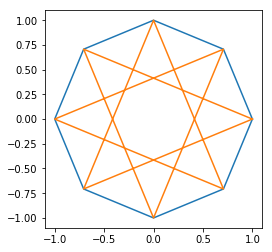

In [37]:
def make_graph1(nodes):
    poly_verts = find_vertices(nodes)
    star_verts=star_reorder_vertices(nodes,poly_verts)
    plotting_graph1(nodes,poly_verts,star_verts)
    return poly_verts,star_verts

(poly_verts,star_verts)=make_graph1(8)

In [21]:
class Point(object):
    def __init__(self, x=0.0,y=0.0):
        self.x = float(x)
        self.y = float(y)

    def __repr__(self):
        coord = (self.x,self.y)
        return coord

    def __str__(self):
        point_str = "(%f,%f)" % (self.x, self.y)
        return point_str

In [72]:
class Line(object):
    def __init__(self, p1, p2):
        self.p1 = Point(p1.x,p1.y)
        self.p2 = Point(p2.x,p2.y)

    def __str__(self):
        x1,y1 = self.p1.x,self.p1.y
        x2,y2 = self.p2.x,self.p2.y
        line = "((%f,%f),(%f,%f))" % (x1,y1,x2,y2)
        return line
     
    __repr__ = __str__
    
    def get_point(self,p):
        if p==p1: return self.p1
        elif p==p2: return self.p2
    
    def length(self):
        dist_x = abs(self.p2.x - self.p1.x)
        dist_y = abs(self.p2.y - self.p1.y)
        dist_x_squared = dist_x ** 2
        dist_y_squared = dist_y ** 2
        line_length = math.sqrt(dist_x_squared + dist_y_squared)
        return line_length

    def slope(self):
        if ((self.p2.x - self.p1.x) ==0):
            line_slope = 'NaN'
        else:
            dist_y = self.p2.y - self.p1.y
            dist_x = self.p2.x - self.p1.x
            line_slope = dist_y/dist_x
        return line_slope

In [77]:
#Test Point Class
a = Point(0,0)
a.x = 6
print(a)

(6.000000,0.000000)


In [78]:
#Test Line Class
b = Point(4,2)
c = Line(a,b)

In [80]:
#This doesn't work yet - want to get point back from line (for easy plotting)
#c.get_point(p1)